In [21]:
import numpy as np
import pandas as pd
import tweepy as tweepy
import matplotlib.pyplot as plt 
import seaborn as sns
from tweepy.parsers import JSONParser
import requests
import json
import time
import re
%matplotlib inline

Lets Gather The data

In [22]:
#exploring dataset
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
res = requests.get(link)
res

<Response [200]>

In [24]:
with open(link.split('/')[-1], mode='wb') as file:
    file.write(res.content)

In [25]:
pic_df = pd.read_csv("image-predictions.tsv", sep='\t')
pic_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
ckey = ""
csec = ""
acctoken = ""
accsec = ""
auth = tweepy.OAuthHandler(ckey, csec)
auth.set_access_token(acctoken, accsec)
api = tweepy.API(auth, parser=JSONParser(), wait_on_rate_limit=True)

In [27]:
tweet = api.get_status(887473957103951883,tweet_mode="extended")

In [28]:
print(tweet["id"])
print(tweet["retweet_count"])

887473957103951883
15629


In [29]:
dflst = []
errorslst = []
tweets = df["tweet_id"]
now = time.time()

In [30]:
for index, t in enumerate(tweets):
    try:
        start = time.time()
        tweet = api.get_status(t,tweet_mode='extended')
        end = time.time()
        print("Reading Tweet {}/{} complete.".format((index+1),len(tweets)))
        recount = tweet['retweet_count']
        favcount = tweet['favorite_count']
        dflst.append({'tweet_id':int(t),
                        'retweet_count':int(recount),
                        'favorite_count':int(favcount)
                       })
    except Exception as e:
        print(str(t) + str(e))
        errorslst.append(t)
print("Done.")

Reading Tweet 1/2356 complete.
Reading Tweet 2/2356 complete.
Reading Tweet 3/2356 complete.
Reading Tweet 4/2356 complete.
Reading Tweet 5/2356 complete.
Reading Tweet 6/2356 complete.
Reading Tweet 7/2356 complete.
Reading Tweet 8/2356 complete.
Reading Tweet 9/2356 complete.
Reading Tweet 10/2356 complete.
Reading Tweet 11/2356 complete.
Reading Tweet 12/2356 complete.
Reading Tweet 13/2356 complete.
Reading Tweet 14/2356 complete.
Reading Tweet 15/2356 complete.
Reading Tweet 16/2356 complete.
Reading Tweet 17/2356 complete.
Reading Tweet 18/2356 complete.
Reading Tweet 19/2356 complete.
888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 21/2356 complete.
Reading Tweet 22/2356 complete.
Reading Tweet 23/2356 complete.
Reading Tweet 24/2356 complete.
Reading Tweet 25/2356 complete.
Reading Tweet 26/2356 complete.
Reading Tweet 27/2356 complete.
Reading Tweet 28/2356 complete.
Reading Tweet 29/2356 complete.
Reading Tweet 30/2356 complete.
Rea

Reading Tweet 242/2356 complete.
Reading Tweet 243/2356 complete.
Reading Tweet 244/2356 complete.
Reading Tweet 245/2356 complete.
Reading Tweet 246/2356 complete.
Reading Tweet 247/2356 complete.
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 249/2356 complete.
Reading Tweet 250/2356 complete.
Reading Tweet 251/2356 complete.
Reading Tweet 252/2356 complete.
Reading Tweet 253/2356 complete.
844704788403113984[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 255/2356 complete.
Reading Tweet 256/2356 complete.
Reading Tweet 257/2356 complete.
Reading Tweet 258/2356 complete.
Reading Tweet 259/2356 complete.
Reading Tweet 260/2356 complete.
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 262/2356 complete.
Reading Tweet 263/2356 complete.
Reading Tweet 264/2356 complete.
Reading Tweet 265/2356 complete.
Reading Tweet 266/2356 complete.
Reading Tweet 267/2356 complete.
Reading

Reading Tweet 481/2356 complete.
Reading Tweet 482/2356 complete.
Reading Tweet 483/2356 complete.
Reading Tweet 484/2356 complete.
Reading Tweet 485/2356 complete.
Reading Tweet 486/2356 complete.
Reading Tweet 487/2356 complete.
Reading Tweet 488/2356 complete.
Reading Tweet 489/2356 complete.
Reading Tweet 490/2356 complete.
Reading Tweet 491/2356 complete.
Reading Tweet 492/2356 complete.
Reading Tweet 493/2356 complete.
Reading Tweet 494/2356 complete.
Reading Tweet 495/2356 complete.
Reading Tweet 496/2356 complete.
Reading Tweet 497/2356 complete.
Reading Tweet 498/2356 complete.
Reading Tweet 499/2356 complete.
Reading Tweet 500/2356 complete.
Reading Tweet 501/2356 complete.
Reading Tweet 502/2356 complete.
Reading Tweet 503/2356 complete.
Reading Tweet 504/2356 complete.
Reading Tweet 505/2356 complete.
Reading Tweet 506/2356 complete.
812747805718642688[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 508/2356 complete.
Reading Tweet 509/2356 complete

Reading Tweet 728/2356 complete.
Reading Tweet 729/2356 complete.
Reading Tweet 730/2356 complete.
Reading Tweet 731/2356 complete.
Reading Tweet 732/2356 complete.
Reading Tweet 733/2356 complete.
Reading Tweet 734/2356 complete.
Reading Tweet 735/2356 complete.
Reading Tweet 736/2356 complete.
Reading Tweet 737/2356 complete.
Reading Tweet 738/2356 complete.
Reading Tweet 739/2356 complete.
Reading Tweet 740/2356 complete.
Reading Tweet 741/2356 complete.
Reading Tweet 742/2356 complete.
Reading Tweet 743/2356 complete.
Reading Tweet 744/2356 complete.
Reading Tweet 745/2356 complete.
Reading Tweet 746/2356 complete.
Reading Tweet 747/2356 complete.
Reading Tweet 748/2356 complete.
Reading Tweet 749/2356 complete.
Reading Tweet 750/2356 complete.
779123168116150273[{'code': 144, 'message': 'No status found with that ID.'}]
Reading Tweet 752/2356 complete.
Reading Tweet 753/2356 complete.
Reading Tweet 754/2356 complete.
Reading Tweet 755/2356 complete.
Reading Tweet 756/2356 complete

Reading Tweet 968/2356 complete.
Reading Tweet 969/2356 complete.
Reading Tweet 970/2356 complete.
Reading Tweet 971/2356 complete.
Reading Tweet 972/2356 complete.
Reading Tweet 973/2356 complete.
Reading Tweet 974/2356 complete.
Reading Tweet 975/2356 complete.
Reading Tweet 976/2356 complete.
Reading Tweet 977/2356 complete.
Reading Tweet 978/2356 complete.
Reading Tweet 979/2356 complete.
Reading Tweet 980/2356 complete.
Reading Tweet 981/2356 complete.
Reading Tweet 982/2356 complete.
Reading Tweet 983/2356 complete.
Reading Tweet 984/2356 complete.
Reading Tweet 985/2356 complete.
Reading Tweet 986/2356 complete.
Reading Tweet 987/2356 complete.
Reading Tweet 988/2356 complete.
Reading Tweet 989/2356 complete.
Reading Tweet 990/2356 complete.
Reading Tweet 991/2356 complete.
Reading Tweet 992/2356 complete.
Reading Tweet 993/2356 complete.
Reading Tweet 994/2356 complete.
Reading Tweet 995/2356 complete.
Reading Tweet 996/2356 complete.
Reading Tweet 997/2356 complete.
Reading Tw

Reading Tweet 1210/2356 complete.
Reading Tweet 1211/2356 complete.
Reading Tweet 1212/2356 complete.
Reading Tweet 1213/2356 complete.
Reading Tweet 1214/2356 complete.
Reading Tweet 1215/2356 complete.
Reading Tweet 1216/2356 complete.
Reading Tweet 1217/2356 complete.
Reading Tweet 1218/2356 complete.
Reading Tweet 1219/2356 complete.
Reading Tweet 1220/2356 complete.
Reading Tweet 1221/2356 complete.
Reading Tweet 1222/2356 complete.
Reading Tweet 1223/2356 complete.
Reading Tweet 1224/2356 complete.
Reading Tweet 1225/2356 complete.
Reading Tweet 1226/2356 complete.
Reading Tweet 1227/2356 complete.
Reading Tweet 1228/2356 complete.
Reading Tweet 1229/2356 complete.
Reading Tweet 1230/2356 complete.
Reading Tweet 1231/2356 complete.
Reading Tweet 1232/2356 complete.
Reading Tweet 1233/2356 complete.
Reading Tweet 1234/2356 complete.
Reading Tweet 1235/2356 complete.
Reading Tweet 1236/2356 complete.
Reading Tweet 1237/2356 complete.
Reading Tweet 1238/2356 complete.
Reading Tweet 

Reading Tweet 1451/2356 complete.
Reading Tweet 1452/2356 complete.
Reading Tweet 1453/2356 complete.
Reading Tweet 1454/2356 complete.
Reading Tweet 1455/2356 complete.
Reading Tweet 1456/2356 complete.
Reading Tweet 1457/2356 complete.
Reading Tweet 1458/2356 complete.
Reading Tweet 1459/2356 complete.
Reading Tweet 1460/2356 complete.
Reading Tweet 1461/2356 complete.
Reading Tweet 1462/2356 complete.
Reading Tweet 1463/2356 complete.
Reading Tweet 1464/2356 complete.
Reading Tweet 1465/2356 complete.
Reading Tweet 1466/2356 complete.
Reading Tweet 1467/2356 complete.
Reading Tweet 1468/2356 complete.
Reading Tweet 1469/2356 complete.
Reading Tweet 1470/2356 complete.
Reading Tweet 1471/2356 complete.
Reading Tweet 1472/2356 complete.
Reading Tweet 1473/2356 complete.
Reading Tweet 1474/2356 complete.
Reading Tweet 1475/2356 complete.
Reading Tweet 1476/2356 complete.
Reading Tweet 1477/2356 complete.
Reading Tweet 1478/2356 complete.
Reading Tweet 1479/2356 complete.
Reading Tweet 

Reading Tweet 1692/2356 complete.
Reading Tweet 1693/2356 complete.
Reading Tweet 1694/2356 complete.
Reading Tweet 1695/2356 complete.
Reading Tweet 1696/2356 complete.
Reading Tweet 1697/2356 complete.
Reading Tweet 1698/2356 complete.
Reading Tweet 1699/2356 complete.
Reading Tweet 1700/2356 complete.
Reading Tweet 1701/2356 complete.
Reading Tweet 1702/2356 complete.
Reading Tweet 1703/2356 complete.
Reading Tweet 1704/2356 complete.
Reading Tweet 1705/2356 complete.
Reading Tweet 1706/2356 complete.
Reading Tweet 1707/2356 complete.
Reading Tweet 1708/2356 complete.
Reading Tweet 1709/2356 complete.
Reading Tweet 1710/2356 complete.
Reading Tweet 1711/2356 complete.
Reading Tweet 1712/2356 complete.
Reading Tweet 1713/2356 complete.
Reading Tweet 1714/2356 complete.
Reading Tweet 1715/2356 complete.
Reading Tweet 1716/2356 complete.
Reading Tweet 1717/2356 complete.
Reading Tweet 1718/2356 complete.
Reading Tweet 1719/2356 complete.
Reading Tweet 1720/2356 complete.
Reading Tweet 

Reading Tweet 1932/2356 complete.
Reading Tweet 1933/2356 complete.
Reading Tweet 1934/2356 complete.
Reading Tweet 1935/2356 complete.
Reading Tweet 1936/2356 complete.
Reading Tweet 1937/2356 complete.
Reading Tweet 1938/2356 complete.
Reading Tweet 1939/2356 complete.
Reading Tweet 1940/2356 complete.
Reading Tweet 1941/2356 complete.
Reading Tweet 1942/2356 complete.
Reading Tweet 1943/2356 complete.
Reading Tweet 1944/2356 complete.
Reading Tweet 1945/2356 complete.
Reading Tweet 1946/2356 complete.
Reading Tweet 1947/2356 complete.
Reading Tweet 1948/2356 complete.
Reading Tweet 1949/2356 complete.
Reading Tweet 1950/2356 complete.
Reading Tweet 1951/2356 complete.
Reading Tweet 1952/2356 complete.
Reading Tweet 1953/2356 complete.
Reading Tweet 1954/2356 complete.
Reading Tweet 1955/2356 complete.
Reading Tweet 1956/2356 complete.
Reading Tweet 1957/2356 complete.
Reading Tweet 1958/2356 complete.
Reading Tweet 1959/2356 complete.
Reading Tweet 1960/2356 complete.
Reading Tweet 

Reading Tweet 2173/2356 complete.
Reading Tweet 2174/2356 complete.
Reading Tweet 2175/2356 complete.
Reading Tweet 2176/2356 complete.
Reading Tweet 2177/2356 complete.
Reading Tweet 2178/2356 complete.
Reading Tweet 2179/2356 complete.
Reading Tweet 2180/2356 complete.
Reading Tweet 2181/2356 complete.
Reading Tweet 2182/2356 complete.
Reading Tweet 2183/2356 complete.
Reading Tweet 2184/2356 complete.
Reading Tweet 2185/2356 complete.
Reading Tweet 2186/2356 complete.
Reading Tweet 2187/2356 complete.
Reading Tweet 2188/2356 complete.
Reading Tweet 2189/2356 complete.
Reading Tweet 2190/2356 complete.
Reading Tweet 2191/2356 complete.
Reading Tweet 2192/2356 complete.
Reading Tweet 2193/2356 complete.
Reading Tweet 2194/2356 complete.
Reading Tweet 2195/2356 complete.
Reading Tweet 2196/2356 complete.
Reading Tweet 2197/2356 complete.
Reading Tweet 2198/2356 complete.
Reading Tweet 2199/2356 complete.
Reading Tweet 2200/2356 complete.
Reading Tweet 2201/2356 complete.
Reading Tweet 

In [127]:
#now lets make the save data as JSON
dfj = pd.DataFrame(dflst, columns = ["tweet_id", "retweet_count", "favorite_count"])
dfj.to_json("tweets_json.txt")

In [128]:
#make it to DF
dfj1 = pd.read_json("tweets_json.txt")
dfj1.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7319,34880
1,892177421306343426,5467,30217
10,890006608113172480,6382,27846
100,872486979161796608,8004,37218
1000,746507379341139972,1036,4479


Now, We move to the assessing phase.

In [129]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [130]:
df.shape

(2356, 17)

In [131]:
df.duplicated().sum()

0

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [133]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [134]:
df["name"].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Daisy             7
Toby              7
Buddy             7
Bailey            7
Rusty             6
Jack              6
Leo               6
Oscar             6
Jax               6
Milo              6
Koda              6
Scout             6
Dave              6
Stanley           6
Bella             6
Larry             5
               ... 
Bradlay           1
Harry             1
Grizz             1
Ester             1
Marty             1
Molly             1
Yoda              1
Chesterson        1
Patch             1
Rolf              1
Zara              1
Severus           1
Snoopy            1
Jareld            1
Nugget            1
Willem            1
Juckson           1
Robin             1
Goose             1


In [135]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [136]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [137]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [138]:
pic_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
881,698703483621523456,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1518,787397959788929025,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1,Chihuahua,0.900483,True,toy_terrier,0.021084,True,miniature_pinscher,0.019484,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False


In [139]:
pic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Quality Issues:


1. remove retweets
2. Time is not in the correct format.
3. Names has some word that are not names, for instance "a", "and".
4. There are 59 nulls in url column.
5. Data type of tweet_id.
6. Some ratings, in rating_denominator column, are above 10, which is the denominator.
7. On the other hand, rating_numerator have values < 10.
8. Some names capitilized, some are not.
9. Some numerator ratings can be extracted from the text of the tweet and be used to fill in the rating_numerator column.

Tidiness issues:

1. Combining all four dogs stages into one
2. in_reply_to_status_id, in_reply_to_user_id columns have null values in them. This is an issue because we want only the original tweets. We will drop these columns later in the project.
3. Dataframes should be combined into one table given that they all describe one tweet.

Cleaning data:

In [140]:
#Firstly, let's make copies of DFs
df_clean = df.copy()
pic_df_clean = pic_df.copy()
dfj_clean = dfj1.copy()

In [141]:
#define: remove retweets
#Code
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

In [142]:
df_clean = df_clean.drop(columns = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"])

In [143]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [144]:
#define: Adjusting time format
#code
df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"])
#test
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [145]:
#define: replacing wrong dogs names to Null
#code
names = ["None", "a", "the", "an"]
x = 0
for i in names:
    df_clean["name"].replace(names[x], "NaN", inplace=True)
    x += 1
    break
#test
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [146]:
#continued...
x = 0
for i in names:
    print(names[x] in df_clean["name"])
    x += 1

False
False
False
False


In [147]:
#Define: Dropping nulls in url column
#code
df_clean["expanded_urls"].dropna(inplace=True)

In [148]:
#test
"Nan" in df_clean["expanded_urls"]

False

In [149]:
#define: Changing the Datatype of tweet ID from int to string
#code
df_clean.tweet_id = df_clean.tweet_id.astype(str)
pic_df.tweet_id = pic_df.tweet_id.astype(str)
dfj_clean.tweet_id = dfj_clean.tweet_id.astype(str)

In [150]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 334.9+ KB


In [151]:
#define: making sure denominator is == 10, as it should
#code
df_clean["rating_denominator"]=10

In [152]:
#test
df_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [153]:
#Define: The numerator column should exclude numbers < than 10 however for example, we will only exclude the values 0, 1, and 2.
#There should be 20 entries excluded but because we have already cleaned there are only 15 entries to be excluded now.
#code
df_clean = df_clean[df_clean.rating_numerator != 0]
df_clean = df_clean[df_clean.rating_numerator != 1]
df_clean = df_clean[df_clean.rating_numerator != 2]

In [154]:
#test
df_clean["rating_numerator"].value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
420       2
15        1
17        1
121       1
99        1
75        1
45        1
27        1
20        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
144       1
182       1
204       1
143       1
666       1
960       1
1776      1
165       1
Name: rating_numerator, dtype: int64

In [155]:
#define: now, well make all dogs names to lower case
#code
lst = ["p1", "p2", "p3"]
x = 0
for i in lst:
    pic_df_clean[lst[x]] = pic_df_clean[lst[x]].str.lower()
    x += 1
    break

In [156]:
#test
pic_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [157]:
#define: we'll extract numerator rating from the tweet text 
#code
df_clean["rating_numerator"] = df_clean.text.str.extract("(\d?\d*\.?\d\d*/)", expand=False)
#test
df_clean[df_clean["tweet_id"] == "666020888022790149"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8/,10,NaN,None,None,None,None


In [158]:
#define: Replace the / character from the rating_numerator column
#code
df_clean["rating_numerator"].replace("/","", inplace = True, regex = True)
#test
df_clean[df_clean["tweet_id"] == "666020888022790149"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,None,None,None,None


Tidiness issues:

In [159]:
#Define: Combining all four dogs stages into one
#code
df_clean['doggo'].replace(np.nan,'', inplace=True)
df_clean['floofer'].replace(np.nan,'', inplace=True)
df_clean['pupper'].replace(np.nan,'', inplace=True)
df_clean['puppo'].replace(np.nan, '', inplace=True)

df_clean['stage'] = 'None'

def get_dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    elif row['floofer'] == 'floofer':
        stage.append('floofer')
    elif row['pupper'] == 'pupper':
        stage.append('pupper')
    elif row['puppo'] == 'puppo':
        stage.append('puppo')
    
    elif len(stage) < 1:
        row['stage'] = 'None'
    else:
        row['stage'] = ','.join(stage)
        
    return row

df_clean = df_clean.apply(get_dog_stage, axis=1)
df_clean['stage'].replace('doggo,pupper','doggo-pupper', inplace=True)
df_clean['stage'].replace('doggo,floofer','doggo-floofer', inplace=True)
df_clean['stage'].replace('doggo,puppo','doggo-puppo', inplace=True)
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [160]:
#test 
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,https://twitter.com/dog_rates/status/668955713...,10,10,a,None
519,810284430598270976,NaN,NaN,2016-12-18 00:43:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's a father. A very good fathe...,https://twitter.com/dog_rates/status/810284430...,13,10,Phil,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,pupper
2098,670727704916926465,NaN,NaN,2015-11-28 22:15:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,None
966,750383411068534784,NaN,NaN,2016-07-05 17:38:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoe. She was trying to stealthily take...,https://twitter.com/dog_rates/status/750383411...,9,10,Zoe,pupper
1355,703611486317502464,NaN,NaN,2016-02-27 16:03:45,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,10,10,Scooter,pupper


In [161]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2156 non-null object
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                2156 non-null datetime64[ns]
source                   2156 non-null object
text                     2156 non-null object
expanded_urls            2101 non-null object
rating_numerator         2156 non-null object
rating_denominator       2156 non-null int64
name                     2156 non-null object
stage                    2156 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 202.1+ KB


In [162]:
#dfine: dropping coloumns
#code
df_clean.drop(['in_reply_to_status_id'], axis=1, inplace = True)
df_clean.drop(['in_reply_to_user_id'], axis=1, inplace = True)

In [163]:
#test
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [164]:
#define: creating 1 master Dataset
#code
mst_ds = pd.merge(df_clean, pic_df_clean, how='left', on='tweet_id')
mst_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2155
Data columns (total 20 columns):
tweet_id              2156 non-null object
timestamp             2156 non-null datetime64[ns]
source                2156 non-null object
text                  2156 non-null object
expanded_urls         2101 non-null object
rating_numerator      2156 non-null object
rating_denominator    2156 non-null int64
name                  2156 non-null object
stage                 2156 non-null object
jpg_url               1978 non-null object
img_num               1978 non-null float64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null object
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null object
p3                    1978 non-null object
p3_conf               1978 non-null float64
p3_dog                1978 non-null object
dtypes: datetime64[ns]

In [165]:
twitter_mst_df = pd.merge(mst_ds, dfj_clean, how='left', on='tweet_id')
#test
twitter_mst_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2155
Data columns (total 22 columns):
tweet_id              2156 non-null object
timestamp             2156 non-null datetime64[ns]
source                2156 non-null object
text                  2156 non-null object
expanded_urls         2101 non-null object
rating_numerator      2156 non-null object
rating_denominator    2156 non-null int64
name                  2156 non-null object
stage                 2156 non-null object
jpg_url               1978 non-null object
img_num               1978 non-null float64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null object
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null object
p3                    1978 non-null object
p3_conf               1978 non-null float64
p3_dog                1978 non-null object
retweet_count         

In [166]:
#define: Drop any rows that do not contain a jpg_url
#code
twitter_mst_df = twitter_mst_df[twitter_mst_df["jpg_url"].notnull()]
#test
twitter_mst_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2155
Data columns (total 22 columns):
tweet_id              1978 non-null object
timestamp             1978 non-null datetime64[ns]
source                1978 non-null object
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null object
rating_denominator    1978 non-null int64
name                  1978 non-null object
stage                 1978 non-null object
jpg_url               1978 non-null object
img_num               1978 non-null float64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null object
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null object
p3                    1978 non-null object
p3_conf               1978 non-null float64
p3_dog                1978 non-null object
retweet_count         

In [167]:
#define: setting columns the right datatype
#code
twitter_mst_df["p1_dog"] = twitter_mst_df["p1_dog"].astype(bool)
twitter_mst_df["p2_dog"] = twitter_mst_df["p2_dog"].astype(bool)
twitter_mst_df["p3_dog"] = twitter_mst_df["p3_dog"].astype(bool)

In [168]:
twitter_mst_df["rating_numerator"] = twitter_mst_df["rating_numerator"].astype(float)

In [169]:
#test
twitter_mst_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2155
Data columns (total 22 columns):
tweet_id              1978 non-null object
timestamp             1978 non-null datetime64[ns]
source                1978 non-null object
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null float64
rating_denominator    1978 non-null int64
name                  1978 non-null object
stage                 1978 non-null object
jpg_url               1978 non-null object
img_num               1978 non-null float64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null bool
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null bool
p3                    1978 non-null object
p3_conf               1978 non-null float64
p3_dog                1978 non-null bool
retweet_count         1971 

Creating CSV file with our new dataset:

In [170]:
#creating CSV file for new Dataset
twitter_mst_df.to_csv("twitter_archive_master.csv")

Acting on data:

In [171]:
#1 Ranking dogs 
pd.set_option('display.max_colwidth', 150)
twitter_mst_df.sort_values(by = "rating_numerator").head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
904,738402415918125056,2016-06-02 16:10:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Don't talk to me or my son ever again"" ...10/10 for both https://t.co/s96OYXZIfK",https://twitter.com/dog_rates/status/738402415918125056/photo/1,0.10,10,NaN,None,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,...,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True,783.0,3122.0
650,772114945936949249,2016-09-03 16:52:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT,https://twitter.com/dog_rates/status/772114945936949249/photo/1,0.10,10,Finn,None,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,...,0.803293,True,toy_terrier,0.052980,True,Italian_greyhound,0.037239,True,457.0,2662.0
812,748977405889503236,2016-07-01 20:31:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,https://twitter.com/dog_rates/status/748977405889503236/photo/1,0.10,10,not,None,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,...,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True,3252.0,10379.0
833,747512671126323200,2016-06-27 19:31:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP,https://twitter.com/dog_rates/status/747512671126323200/photo/1,0.10,10,NaN,None,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,...,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True,1539.0,5316.0
1445,684594889858887680,2016-01-06 04:38:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY"" ...10/10 https://t.co/uhQNehTpIu",https://twitter.com/dog_rates/status/684594889858887680/photo/1,0.10,10,NaN,None,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,...,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True,3320.0,8515.0
931,733482008106668032,2016-05-20 02:18:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Ello this is dog how may I assist"" ...10/10 https://t.co/jeAENpjH7L",https://twitter.com/dog_rates/status/733482008106668032/photo/1,0.10,10,NaN,None,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,...,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False,895.0,2979.0
891,740214038584557568,2016-06-07 16:09:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X,https://twitter.com/dog_rates/status/740214038584557568/photo/1,0.10,10,getting,None,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,...,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True,1867.0,6406.0
897,739544079319588864,2016-06-05 19:47:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,https://twitter.com/dog_rates/status/739544079319588864/photo/1,0.10,10,NaN,None,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,...,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,20121.0,37771.0
918,736010884653420544,2016-05-27 01:47:23,"<a href=""http://twitter.com/d

In [172]:
#2 Most retweeted tweet
twitter_mst_df.retweet_count.max()

73908.0

In [173]:
twitter_mst_df.loc[twitter_mst_df["retweet_count"]== 73908.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
860,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,73908.0,149884.0


In [174]:
#3 Tweet source type
twitter_mst_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1940
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

As we can conclud from information above, most tweeters are using Twitter app for Iphones.

Visualization:

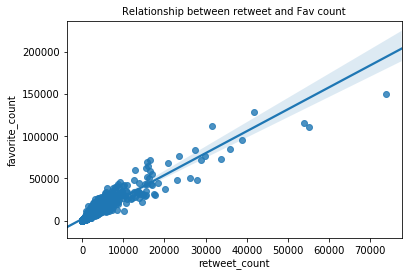

In [175]:
# relationship between retweet and Fav count.
vis = twitter_mst_df[["retweet_count", "favorite_count"]]
sns.regplot(vis["retweet_count"], vis["favorite_count"]).set_title("Relationship between retweet and Fav count", size = 10);